# Problem Statement
The customer churn dataset is a collection of customer data that focuses on predicting customer churn, which refers to the tendency of customers to stop using a company's products or services. The dataset contains various features that describe each customer, such as their credit score, country, gender, age, tenure, balance, number of products, credit card status, active membership, estimated salary, and churn status. The churn status indicates whether a customer has churned or not. The dataset is used to analyze and understand factors that contribute to customer churn and to build predictive models to identify customers at risk of churning. The goal is to develop strategies and interventions to reduce churn and improve customer retention

The dataset with 10000 records has the following columns:
* customer_id'
* 'credit_score'
* 'country', 
* 'gender', 
* 'age', 
* 'tenure':working experience in years
* 'balance', 
* 'products_number': how many product does the customer hold?
* 'credit_card': 1 means the cusstomer has the credict card while 0 means the customer does not; 
* 'active_member',: 1 means yes while 0 means no;
* 'estimated_salary', 
* 'churn'

    

# 1. Import libraries

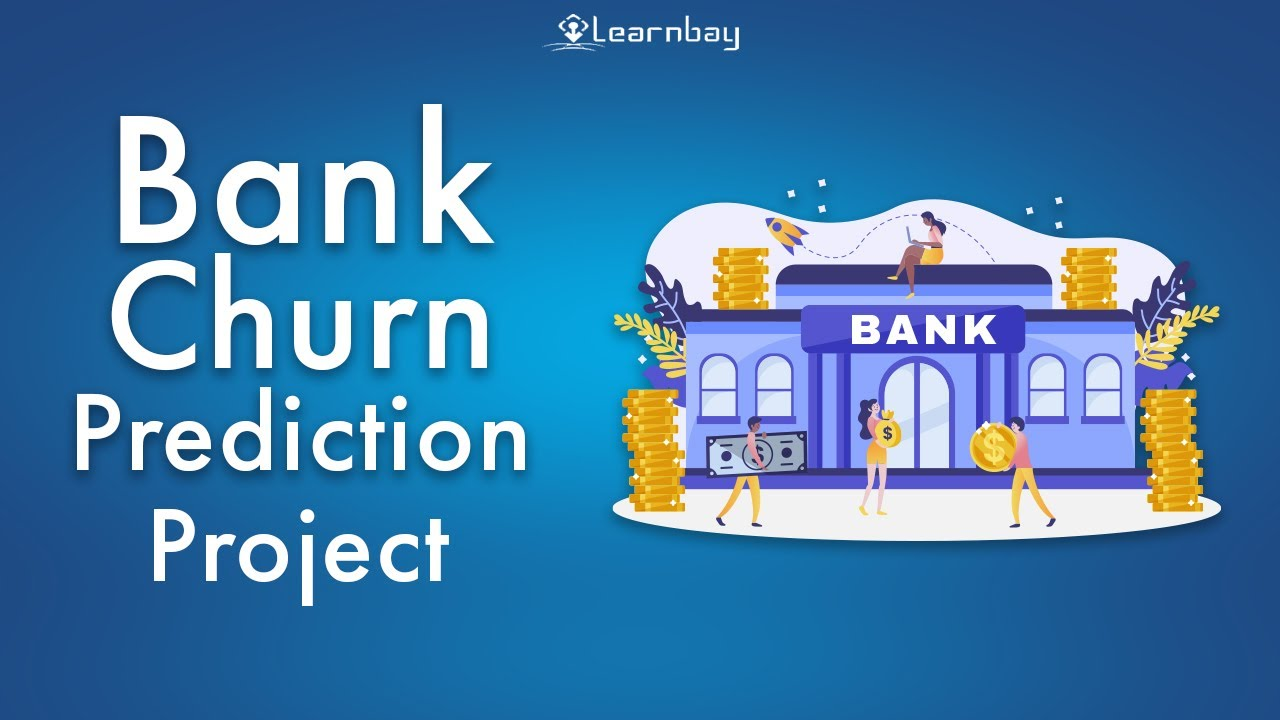

In [1]:
from IPython.display import display, HTML, Image

Image("maxresdefault.jpg")


In [130]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.metrics import confusion_matrix
plt.style.use('seaborn')

# 2. load data

In [3]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      9917 non-null   float64
 2   country           9827 non-null   object 
 3   gender            10000 non-null  object 
 4   age               9873 non-null   float64
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


* Their are missing values and we have to handle it as well

In [92]:
df.describe(include = 'all')

,credit_score,country,age,balance,products_number,credit_card,active_member,estimated_salary,churn
count,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000,15926.000000
mean,648.326047,0.140588,41.092994,82457.303299,1.416740,0.627465,0.370840,100487.997002,0.500000
std,91.151725,0.447720,10.004008,61162.022212,0.571928,0.483495,0.483045,57775.251911,0.500016
min,350.000000,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,586.749939,0.000000,34.000000,0.000000,1.000000,0.000000,0.000000,51288.745222,0.000000
50%,650.000000,0.000000,40.000000,103508.805000,1.000000,1.000000,0.000000,101140.290000,0.500000
75%,710.000000,0.000000,47.000000,129344.089757,2.000000,1.000000,1.000000,149859.657570,1.000000
max,850.000000,2.000000,92.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [6]:
df.duplicated().sum()

0

* no deplulicated values. 

# 3. EDA

3.1 Customer

we are going to check the churn customer dataset

### BALANCING TARGET VARIABLE

In [7]:
df_churn = df[df['churn']==1]
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       2037 non-null   int64  
 1   credit_score      2024 non-null   float64
 2   country           1999 non-null   object 
 3   gender            2037 non-null   object 
 4   age               2009 non-null   float64
 5   tenure            2037 non-null   int64  
 6   balance           2037 non-null   float64
 7   products_number   2037 non-null   int64  
 8   credit_card       2037 non-null   int64  
 9   active_member     2037 non-null   int64  
 10  estimated_salary  2037 non-null   float64
 11  churn             2037 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 206.9+ KB


## MISSING VALUES ANALYSIS

In [8]:
df['credit_score'].fillna(df['credit_score'].median(), inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace = True)
df['age'].fillna(df['age'].median(), inplace=True)


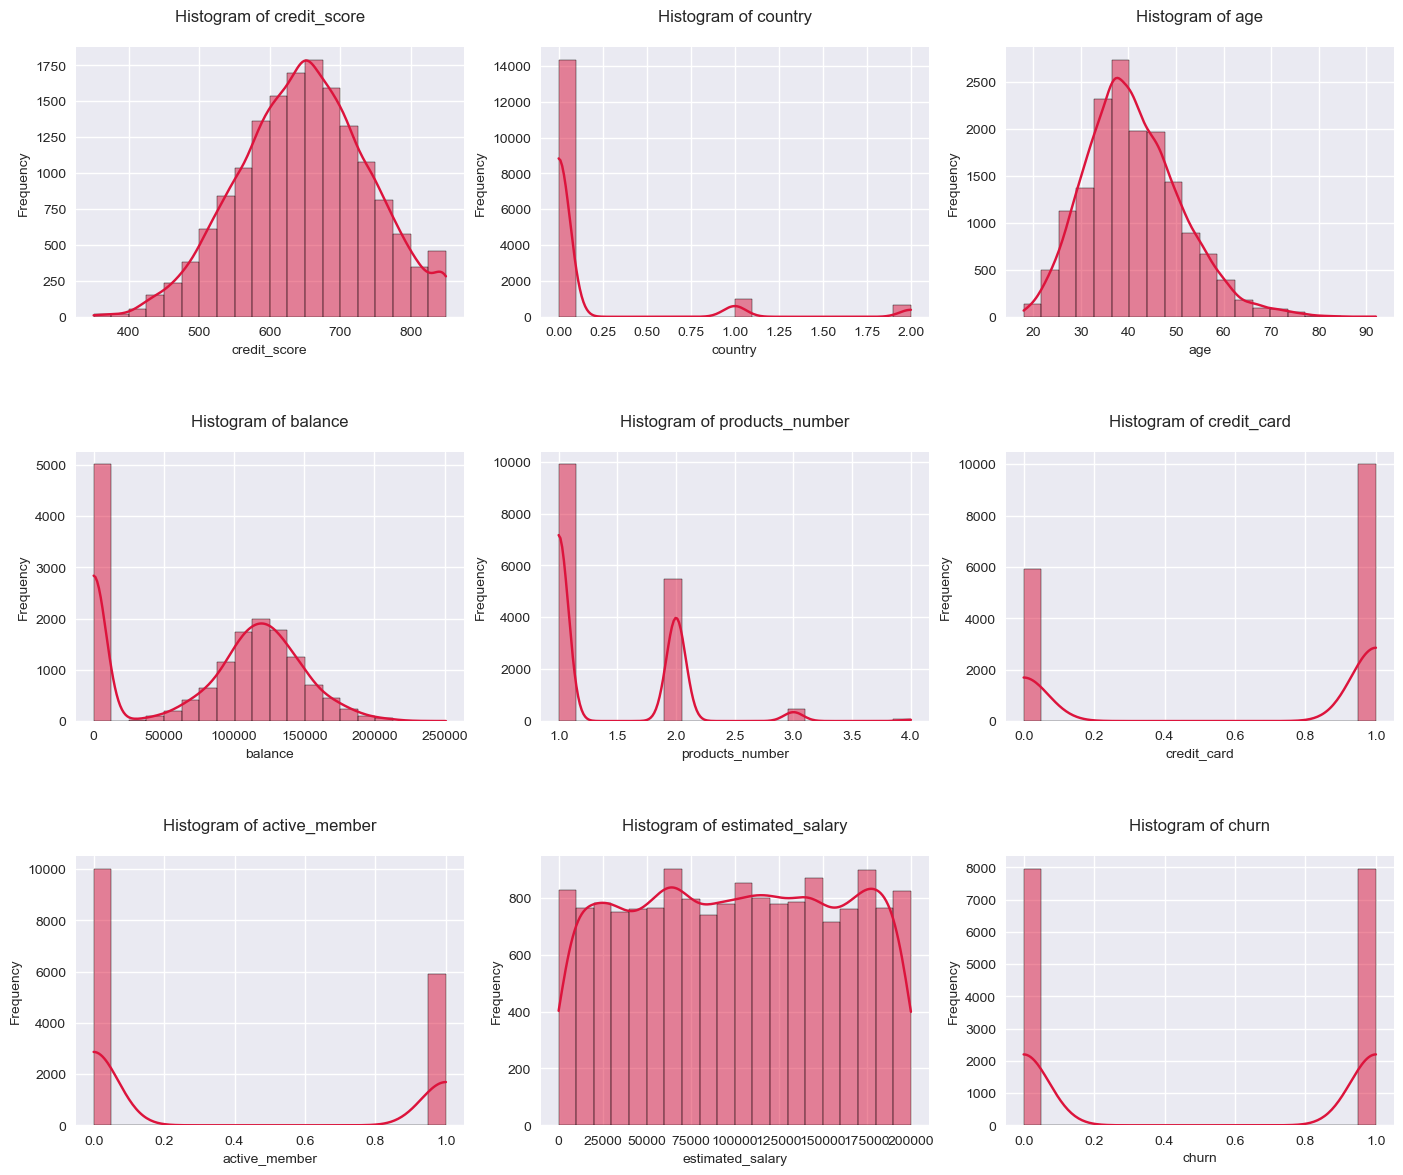

In [139]:
plt.figure(figsize=(17, 14))

num_features = df.select_dtypes(exclude = 'object').columns
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True, bins=20, color='crimson', edgecolor='black')
    plt.title(f"Histogram of {feature}\n")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.subplots_adjust(hspace=0.5)
plt.show()

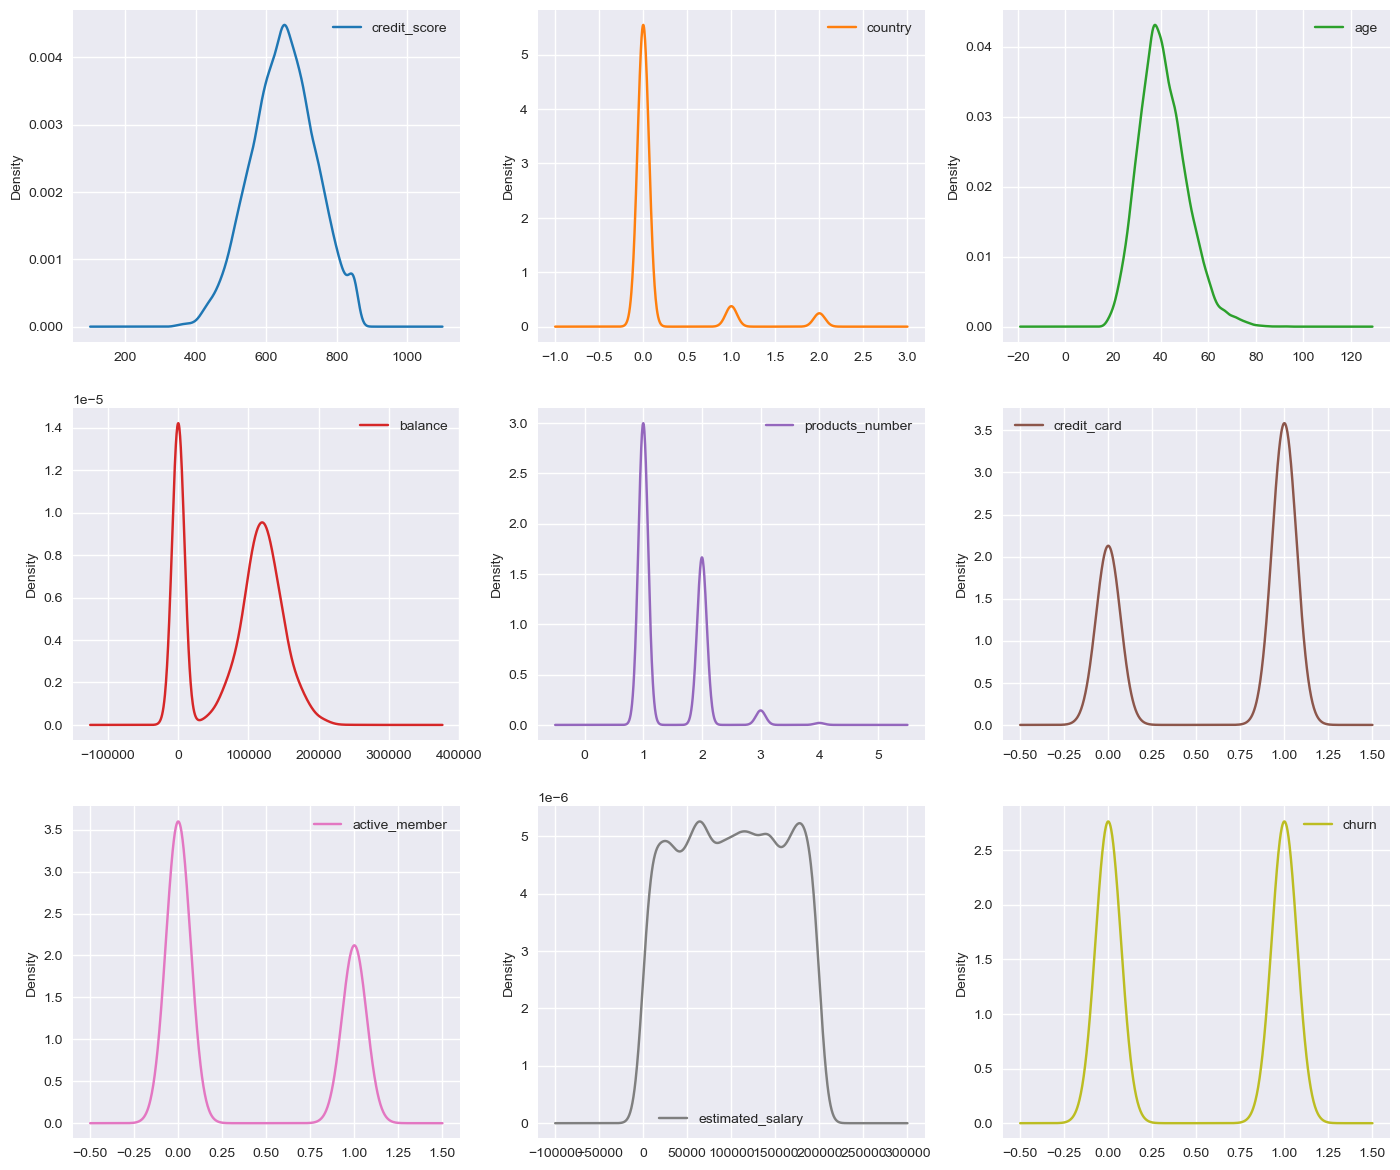

In [148]:
colors = sns.color_palette("tab10")

df.plot(kind='density',subplots=True, layout=(5,3), sharex=False, sharey=False , figsize =(17,25) , color = colors, grid = True )

plt.show()

In [149]:
df.skew()

credit_score       -0.075257
country             3.255590
age                 0.567064
balance            -0.297899
products_number     1.133261
credit_card        -0.527329
active_member       0.534841
estimated_salary   -0.010253
churn               0.000000
dtype: float64

* From the above graph we can see that most of the data in the column are normalized expect Country and Products_numbers

In [105]:
country = df_churn['country'].value_counts()
country

France     1714
Germany     175
Spain       110
Name: country, dtype: int64

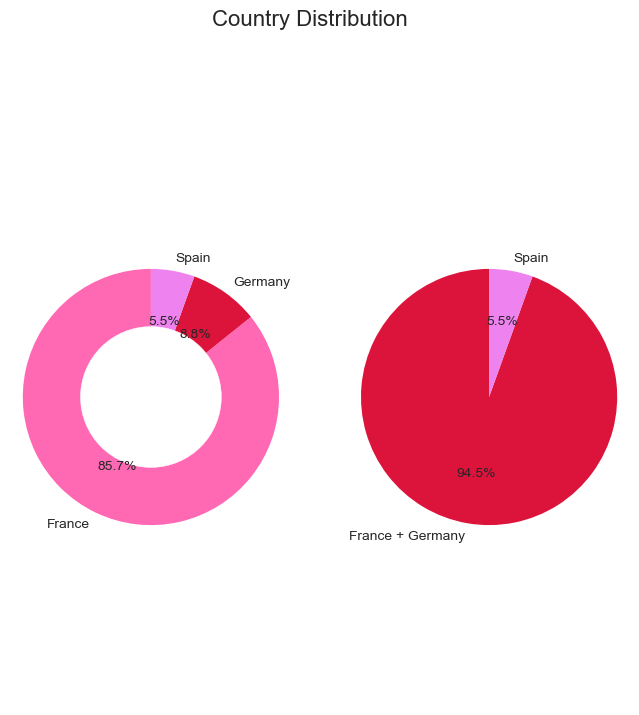

In [140]:
sizes =[1714,175,110]
labels = ['France','Germany','Spain']

sizes2 =[1889,110]
labels2 = ['France + Germany','Spain']

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.pie(sizes,labels=labels, autopct='%1.1f%%', startangle=90,colors=['hotpink','crimson','violet'])


cricle = plt.Circle(xy=(0,0), radius = 0.55, color = 'white')
plt.gcf()
plt.gca().add_artist(cricle)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=90, colors=['crimson','violet'])
plt.axis('equal')  


plt.suptitle('Country Distribution', fontsize=16)
plt.show()



* There are only 2037 customers in 10000 records;
* Around 94.5% of churn customers are from Germany and France;

* Gender 

In [141]:
df_churn['gender'].value_counts(normalize=True)

Female    0.559156
Male      0.440844
Name: gender, dtype: float64

* age

In [143]:
df_churn['age'].describe()

count    2009.000000
mean       44.811847
std         9.755193
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: age, dtype: float64

In [95]:
df_churn['age_']=pd.cut(df_churn['age'], bins=5,precision=0)
df_churn['age_'].value_counts(normalize=True)

(44.0, 58.0]    0.410652
(31.0, 44.0]    0.399204
(58.0, 71.0]    0.096068
(18.0, 31.0]    0.089099
(71.0, 84.0]    0.004978
Name: age_, dtype: float64

In [19]:
age = count_frequency(df_churn, 'age_')
age

,age_,count,frequency
3,"(18.0, 31.0]",179,8.909905
1,"(31.0, 44.0]",802,39.920358
0,"(44.0, 58.0]",825,41.065207
2,"(58.0, 71.0]",193,9.606770
4,"(71.0, 84.0]",10,0.497760


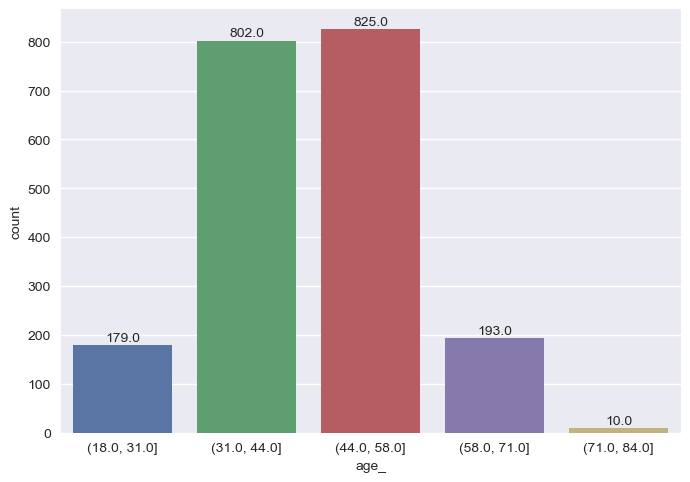

In [20]:
ax=sns.countplot(data=df_churn, x='age_')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

* Churn customers are between 18 and 84 years old;
* And we can see that the majority of the customers are from the age group of 31 to 58 years old

* estimated salary

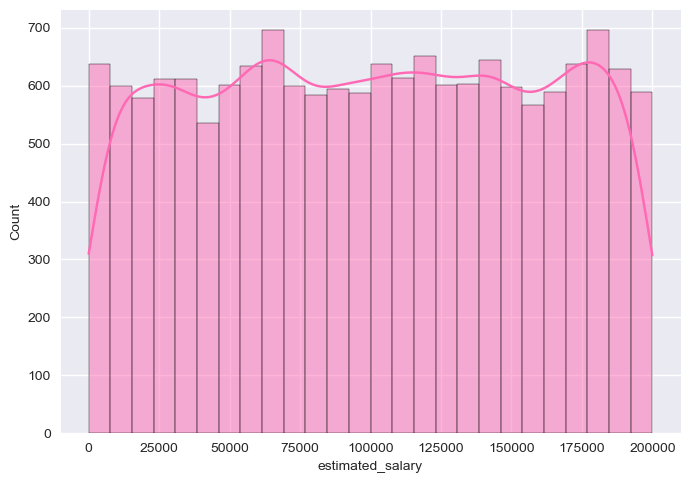

In [102]:
sns.histplot(data=df, x='estimated_salary', color='hotpink', kde=True)

# Show the plot
plt.show()

* The distribution of estimated salary is looking normalized.

In [117]:
df['estimated_salary'].skew()

-0.010253277417773885

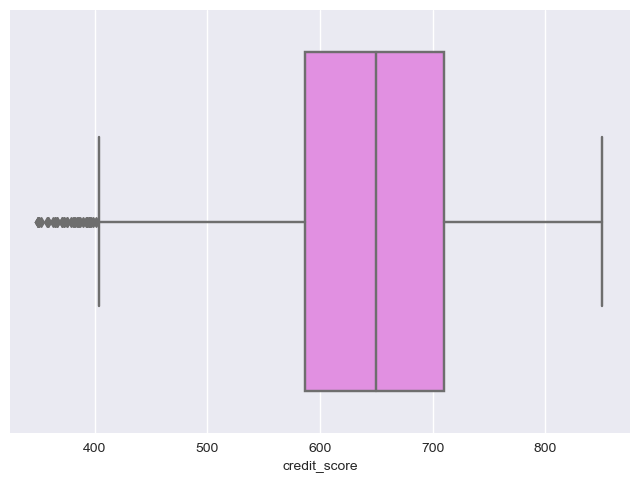

In [118]:
sns.boxplot(data=df,x='credit_score' ,color ='violet')
plt.show()

In [119]:
def find_outliers(data, x):
    q1=np.percentile(data[x], 25)
    q3=np.percentile(data[x], 75)
    iqr = q3-q1
    data1 =data[(data[x]<q1-1.5*iqr)|(data[x]>q3+1.5*iqr)][x].value_counts()
    return data1
    

In [121]:
find_outliers(df, 'credit_score')

350.000000    5
376.000000    2
380.682284    1
393.178884    1
385.110205    1
394.842631    1
352.647963    1
366.972429    1
393.175158    1
396.516819    1
389.431099    1
396.147013    1
358.315701    1
384.198369    1
387.394078    1
392.269890    1
372.700854    1
365.323710    1
370.728537    1
363.000000    1
378.779812    1
371.014101    1
373.000000    1
382.000000    1
367.000000    1
395.000000    1
383.000000    1
386.000000    1
401.000000    1
365.000000    1
351.000000    1
358.000000    1
359.000000    1
399.000000    1
393.555732    1
Name: credit_score, dtype: int64

In [122]:
def remove_outliers(data, x):
    q1=np.percentile(data[x], 25)
    q3=np.percentile(data[x], 75)
    iqr = q3-q1
    data1 =data[(data[x]>=q1-1.5*iqr)&(data[x]<=q3+1.5*iqr)]
    return data1
    

In [123]:
df1 =remove_outliers(df, 'credit_score')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15886 entries, 0 to 15925
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      15886 non-null  float64
 1   country           15886 non-null  int32  
 2   age               15886 non-null  float64
 3   balance           15886 non-null  float64
 4   products_number   15886 non-null  int64  
 5   credit_card       15886 non-null  int64  
 6   active_member     15886 non-null  int64  
 7   estimated_salary  15886 non-null  float64
 8   churn             15886 non-null  int64  
dtypes: float64(4), int32(1), int64(4)
memory usage: 1.2 MB


* There are 11 cutomers who have lower credit score than majerity of churn customers while there are only 15 customers who have comparetively low credict scores. 
* remove the outliers in credit score

* products_number

In [29]:
df['products_number'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

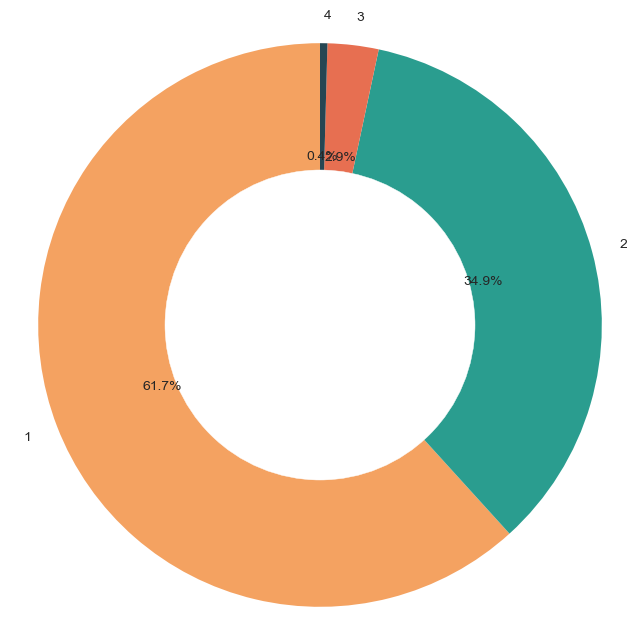

In [129]:
sizes =[9826,5558,465,67]
labels = ['1','2','3','4']

plt.figure(figsize=(8, 8))

plt.pie(sizes,labels=labels, autopct='%1.1f%%', startangle=90,colors = ['#f4a261','#2a9d8f','#e76f51','#264653'],labeldistance=1.1)


cricle = plt.Circle(xy=(0,0), radius = 0.55, color = 'white')
plt.gcf()
plt.gca().add_artist(cricle)
plt.axis('equal')
plt.show()

* 62% of customers only have one product service
* And very less number of customer with 4 products i.e 0.4%

* credit card

In [31]:
cre_card = count_frequency(df_churn, 'credit_card')
cre_card

,credit_card,count,frequency
1,0,613,30.093274
0,1,1424,69.906726


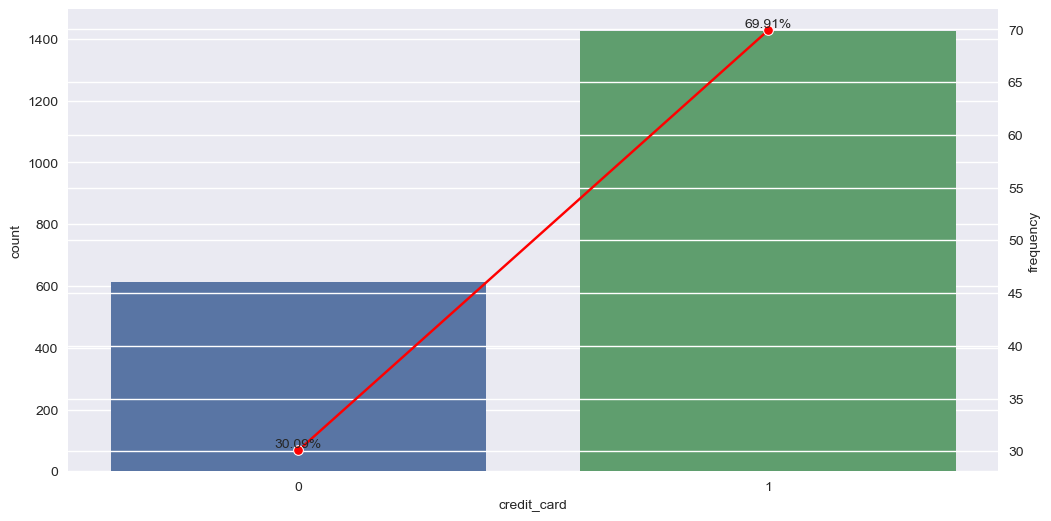

In [32]:
count_fre_plot(cre_card, 'credit_card')

* 69% of churn customers have credit card;
* people who have credit card are more likely to churn

* active_member

In [33]:
active = count_frequency(df_churn, 'active_member')
active

,active_member,count,frequency
0,0,1302,63.917526
1,1,735,36.082474


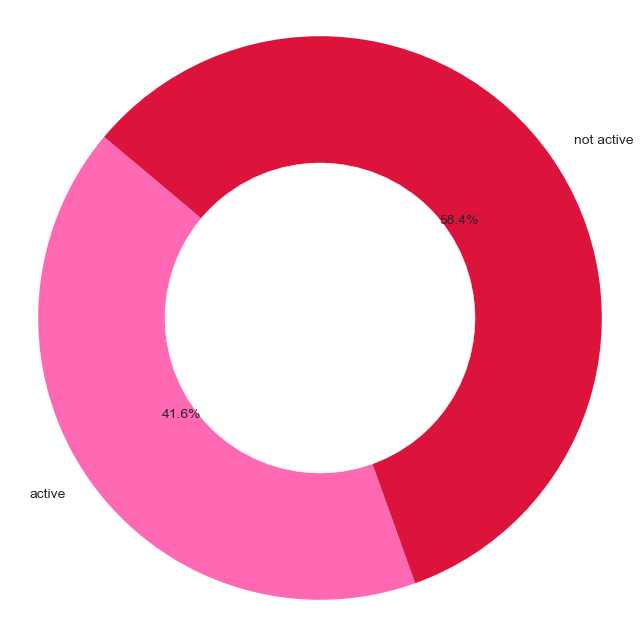

In [34]:
sizes =[735,1032]
labels = ['active','not active']

plt.figure(figsize=(8, 8))

plt.pie(sizes,labels=labels, autopct='%1.1f%%', startangle=140,colors=['hotpink','crimson'])


cricle = plt.Circle(xy=(0,0), radius = 0.55, color = 'white')
plt.gcf()
plt.gca().add_artist(cricle)
plt.axis('equal')
plt.show()

* balance

In [35]:
count_frequency(df_churn, 'balance')

,balance,count,frequency
0,0.00,500,24.545901
681,3768.69,1,0.049092
342,12459.19,1,0.049092
311,23503.31,1,0.049092
1164,24043.45,1,0.049092
797,27755.97,1,0.049092
1445,28082.95,1,0.049092
1326,29602.08,1,0.049092
1279,33563.95,1,0.049092
956,36566.96,1,0.049092


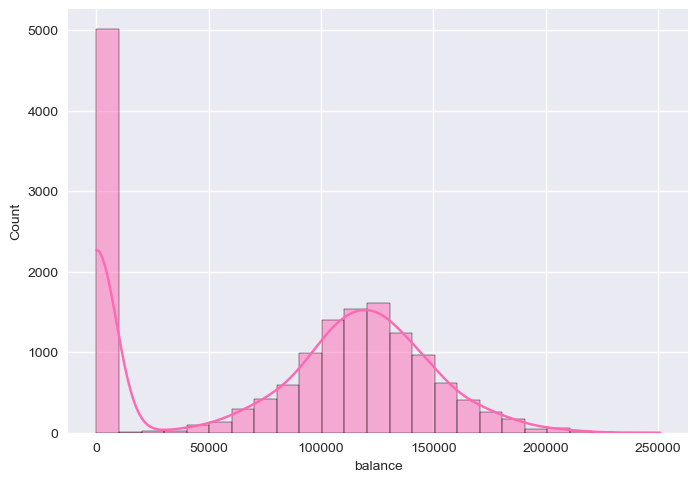

In [108]:
sns.histplot(data=df, x='balance',color = 'hotpink',kde = True)


plt.show()

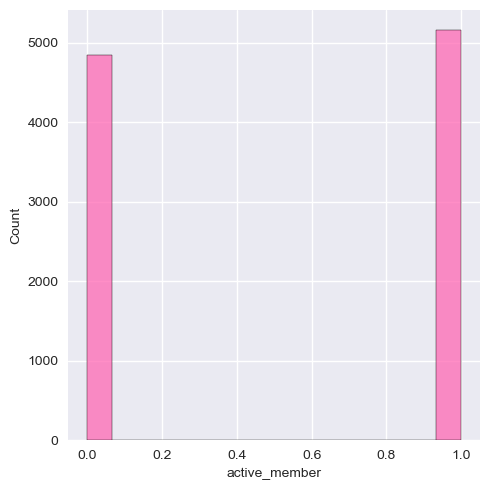

In [37]:
sns.displot(data=df, x='active_member',color='hotpink')

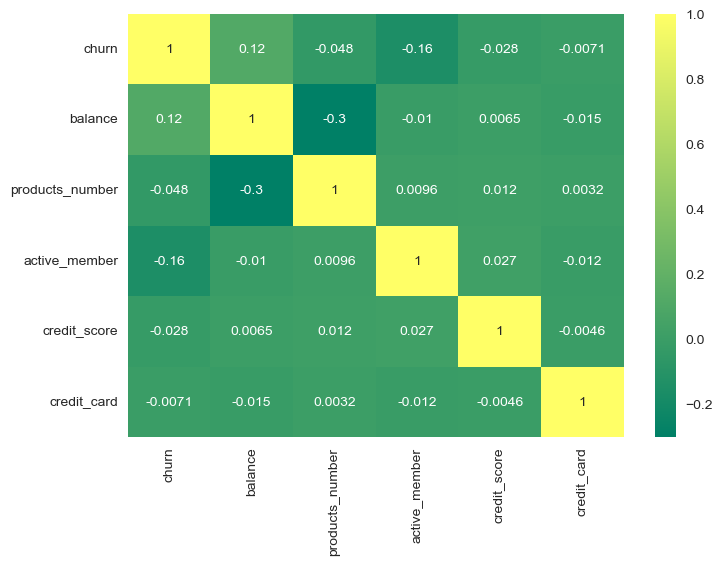

In [38]:
sns.heatmap(df[['churn','balance', 'products_number', 'active_member', 'credit_score', 'credit_card']].corr(), annot=True, cmap='summer')
plt.show()

# 4. Preprocessing

try differnt ways to handle the balance feature 

In [39]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

* As we can see that our target variable is unbalanced so we have to balance it.

In [40]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850.0,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [41]:
df.drop('customer_id', axis=1, inplace=True)

In [42]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  

df['country']= label_encoder.fit_transform(df['country'])
df['gender']= label_encoder.fit_transform(df['gender'])


In [43]:
df = df.drop(['tenure','gender'],axis = 1)

In [44]:
df.head(5)

,credit_score,country,age,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619.0,0,42.0,0.00,1,1,1,101348.88,1
1,608.0,2,41.0,83807.86,1,0,1,112542.58,0
2,502.0,0,42.0,159660.80,3,1,0,113931.57,1
3,699.0,0,39.0,0.00,2,0,0,93826.63,0
4,850.0,2,43.0,125510.82,1,1,1,79084.10,0


In [45]:
X =df.drop('churn',axis=1)
Y=df['churn']

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, Y = smote.fit_resample(X, Y)
df = pd.concat([pd.DataFrame(X), pd.DataFrame(Y)], axis=1)

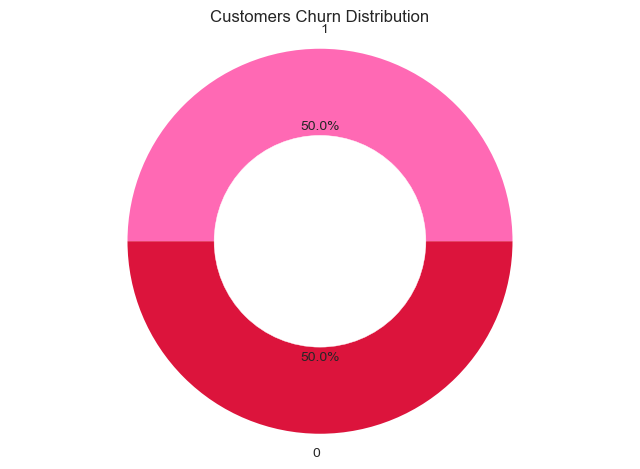

In [47]:
customers_counts = df['churn'].value_counts()
customer_percentages = customers_counts / len(df) * 100


plt.pie(customers_counts, labels=customers_counts.index, autopct='%1.1f%%',colors=['hotpink','crimson'])
plt.title('Customers Churn Distribution')
cricle = plt.Circle(xy=(0,0), radius = 0.55, color = 'white')
plt.gcf()
plt.gca().add_artist(cricle)

plt.axis('equal')  
plt.show()

In [48]:
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split


In [49]:
X_train,X_test, y_train, y_test =train_test_split(X, Y, test_size=0.3, random_state=1)

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [51]:
X_test =scaler.transform(X_test)

# 5. KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier()

In [54]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [55]:
y_pred = knn.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score
knn_test = accuracy_score(y_test, y_pred)

In [57]:
knn_test

0.7992884051904563

In [58]:
score_list=[]

In [59]:
score_list.append(knn_test)

# 6. Decision tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
clf= DecisionTreeClassifier(criterion="gini",max_depth= 5)

In [62]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [63]:
y_pred = clf.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
clf_test=accuracy_score(y_test, y_pred)

In [65]:
clf_test

0.797614064462118

In [66]:
score_list.append(clf_test)

# 6.Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr = LogisticRegression()

In [71]:
lr.fit(X_train,y_train)

LogisticRegression()

In [72]:
y_pred = lr.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score
lr_test=accuracy_score(y_test, y_pred)

In [75]:
lr_test

0.7463373796567602

In [76]:
score_list.append(lr_test)

# Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
y_pred = rf.predict(X_test)

In [155]:
from sklearn.metrics import classification_report
rf_test = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2322
           1       0.81      0.80      0.81      2456

    accuracy                           0.80      4778
   macro avg       0.80      0.80      0.80      4778
weighted avg       0.80      0.80      0.80      4778



In [80]:
rf_test

0.8511929677689409

In [81]:
score_list.append(rf_test)

## SVC

In [131]:
svc_model = SVC()

In [132]:
svc_model.fit(X_train, y_train)

SVC()

In [133]:
y_pred = svc_model.predict(X_test)

In [134]:
svc_test = accuracy_score(y_test,y_pred)

In [135]:
svc_test

0.8020092088740058

In [136]:
score_list.append(svc_test)

In [137]:
score_list

[0.7992884051904563,
 0.797614064462118,
 0.7463373796567602,
 0.8511929677689409,
 0.8020092088740058]

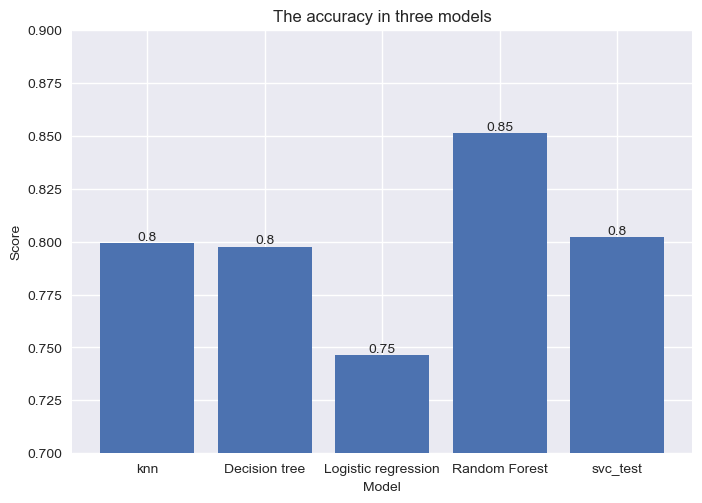

In [138]:
plt.bar(['knn', 'Decision tree','Logistic regression','Random Forest','svc_test'], score_list)
plt.ylim(0.7, 0.9)
for x, y in enumerate(score_list):
    plt.text(x, y, str(round(y, 2)), ha='center', va='bottom')
plt.title('The accuracy in three models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()

* The Random Forest can outperform other models.

In [ ]:
from joblib import dump

dump(rf, './../Savedmodels/bank_churn_model2.joblib')